## Importing packages needed for the analysis

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## Read the provided csv-file to a dataframe and examine the most important things

In [2]:
df=pd.read_csv('train.csv')
pd.set_option('display.max_columns', 90)
pd.set_option('display.max_rows', 85)

In [3]:
df.shape

(1460, 81)

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [7]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


#### The below commands were executed to examine the df, but the outcome is deleted, to make the notebook more compact

In [ ]:
df['YrSold'].value_counts()
df['Neighborhood'][df['YrSold']=='2010']
df.loc[(df['YrSold']==2010)]['Neighborhood'].value_counts()
df['GarageFinish'].value_counts()
df['Utilities'].value_counts() #can be dropped, because it provides no additional information
df['MSSubClass'].value_counts()
df['MSZoning'].value_counts()
df['LotArea'].value_counts() #can use it's min & max and create bins within the span
df['LotArea'].min()
df['LotArea'].max()
df['Street'].value_counts()
df['Alley'].value_counts()
df['LotConfig'].value_counts() 
df['Condition1'].value_counts()
df['Condition2'].value_counts()
df['BldgType'].value_counts() #can be compared to the average
df['HouseStyle'].value_counts() 
df['OverallQual'].value_counts()
df['OverallCond'].value_counts()
df['YearBuilt'].value_counts() # could be summarized in bins 
df['YearRemodAdd'].value_counts()
df['Exterior1st'].value_counts() # asbest 1st & 2nd
df['ExterQual'].value_counts()
df['ExterCond'].value_counts() # 1poor
df['BsmtCond'].value_counts() # keller 
df['Heating'].value_counts() # better consider heatingQC
df['HeatingQC'].value_counts()
df['CentralAir'].value_counts() # boolean
df['LowQualFinSF'].value_counts()
df['FullBath'].value_counts()
df['BedroomAbvGr'].value_counts() # we'll drop rows with 0 bedrooms
df['KitchenAbvGr'].value_counts() # examine or delete rows with 0 kitchens
df['KitchenQual'].value_counts() # more important than the number of kitchens
df['TotRmsAbvGrd'].value_counts() # does not include bathroom
df['Fireplaces'].value_counts()
df['FireplaceQu'].value_counts()
df['GarageQual'].value_counts()
df['GarageCond'].value_counts()
df['Fence'].value_counts()
df['MoSold'].value_counts()
df['YrSold'].value_counts()
df['SaleCondition'].value_counts() # no matter

## Data Cleaning

In [8]:
df.shape[0]*1/4 #this could be our benchmark: we'll drop columns with more than 365 nans, but instad we use another
#approach: we delete columns, that are unnecessary for our examination and afterwards we replace the nans with 
#suitable values in the residual columns

365.0

In [10]:
df.isna().sum().sort_values(ascending=False) #first view of whatever columns have the most nans

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

In [11]:
columns_to_drop=['MSSubClass','MSZoning','Street', 'Alley','SaleType','1stFlrSF', '2ndFlrSF','Electrical','Utilities',
                 'LotConfig','Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1','BsmtFinType2',
                 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating','LotShape', 'LandContour','LandSlope','GarageType',
                 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'MasVnrType','3SsnPorch', 'ScreenPorch', 
                 'PoolArea', 'PoolQC','MiscFeature', 'MiscVal','PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
                 'EnclosedPorch','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd','MasVnrArea', 
                 'ExterCond','Functional','HouseStyle','1stFlrSF', '2ndFlrSF','BldgType','BsmtFullBath', 'BsmtHalfBath',
                 'LowQualFinSF','Fence','LotFrontage','GarageCond','Condition1', 'Condition2','SaleCondition'
                ]

#Columns we'll not drop right now:
        
       #'Neighborhood', 'Condition1', 'Condition2', 'OverallQual', 'OverallCond', 'YearBuilt', 
       #'YearRemodAdd', 'HeatingQC', 'CentralAir', 'GrLivArea',  'FireplaceQu','BsmtQual',
       #'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual','TotRmsAbvGrd',  'Fireplaces', 
       #'MoSold', 'YrSold', 'SalePrice''ExterQual','GarageQual'

In [12]:
df.drop(columns=columns_to_drop,inplace=True)

In [13]:
df.isna().sum()>0 # as described above, we check, where there are nans appearing and how to replace those values with
#suitable ones within the existing series-values

Id              False
LotArea         False
Neighborhood    False
OverallQual     False
OverallCond     False
YearBuilt       False
YearRemodAdd    False
ExterQual       False
BsmtQual         True
HeatingQC       False
CentralAir      False
GrLivArea       False
FullBath        False
HalfBath        False
BedroomAbvGr    False
KitchenAbvGr    False
KitchenQual     False
TotRmsAbvGrd    False
Fireplaces      False
FireplaceQu      True
GarageQual       True
MoSold          False
YrSold          False
SalePrice       False
dtype: bool

In [14]:
#we assume, nan means, the concerned house has this feature not, so we five it a sign for this ('-').
df['BsmtQual']=df['BsmtQual'].fillna('-')
df['FireplaceQu']=df['FireplaceQu'].fillna('-')
df['GarageQual']=df['GarageQual'].fillna('-')

###### Explanation for the abbreviations
Ex	Excellent <br /> 
Gd	Good <br /> 
TA	Average/Typical <br /> 
Fa	Fair <br /> 
Po	Poor <br />  

In [15]:
#columns, that contain the above abbreviations:
to_convert=['ExterQual','BsmtQual','HeatingQC','KitchenQual','FireplaceQu','GarageQual']

In [16]:
#we calculate the mean of the values we plan to pass to the quality attributes, to assign it to the particular 
#column for each house, so that it is neither negative nor positive, because the feature's quality should only
#play a role, if it exists.
a=[5,4,3,2,1]
mean=int(sum(a)/len(a))

In [17]:
#define a function, to which the columns with quality attributes will be passed to convert:
def convert_quality(ser):
    ser.replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'-':mean}, inplace=True)
    return ser

In [18]:
#convert and assign the values of the columns, to switch from categorical to numeric values, so that lateron
#the calculation of correlations will be possible:
eq=convert_quality(df['ExterQual'])
bq=convert_quality(df['BsmtQual'])
hq=convert_quality(df['HeatingQC'])
kq=convert_quality(df['KitchenQual'])
fq=convert_quality(df['FireplaceQu'])
gq=convert_quality(df['GarageQual'])

In [19]:
#examine types once again, cause we would like to have integers, or numerical values in general, whenever possible.
df.dtypes

Id               int64
LotArea          int64
Neighborhood    object
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
ExterQual       object
BsmtQual         int64
HeatingQC       object
CentralAir      object
GrLivArea        int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
KitchenQual     object
TotRmsAbvGrd     int64
Fireplaces       int64
FireplaceQu      int64
GarageQual       int64
MoSold           int64
YrSold           int64
SalePrice        int64
dtype: object

In [32]:
df['CentralAir'].replace({'Y':1,'N':0},inplace=True)
df['ExterQual']= df['ExterQual'].astype('int64')
df['BsmtQual']= df['BsmtQual'].astype('int64')
df['KitchenQual']= df['KitchenQual'].astype('int64')
df['FireplaceQu']= df['FireplaceQu'].astype('int64')
df['GarageQual']= df['GarageQual'].astype('int64')
df['ExterQual']=df['ExterQual'].astype('int64')   
df['HeatingQC']=df['HeatingQC'].astype('int64')

In [35]:
#drop more columns that seem not suitable for the analysis:
df.drop(columns=['KitchenAbvGr','HalfBath','FullBath'],inplace=True)

## Further examinations and some plotting dependant on the Sale Price

In [39]:
df_group=df.groupby(by='YrSold')

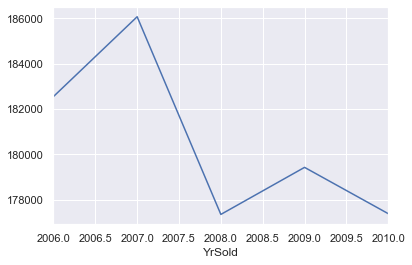

In [37]:
df_group.mean()['SalePrice'].plot();

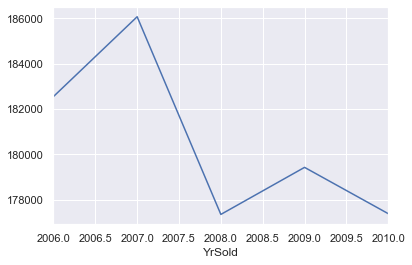

In [38]:
df_groupby_year=df.groupby(by='YrSold')
df_groupby_year['SalePrice'].mean().plot();
#as assumed the two plots are equal.

In [41]:
#examine if there is something special about the rooms with no bedrooms and then decide to drop those rows from our df
df[df['BedroomAbvGr']==0]
rows_to_drop=df[df['BedroomAbvGr']==0].index.tolist()
df.drop(df.index[rows_to_drop],inplace=True)

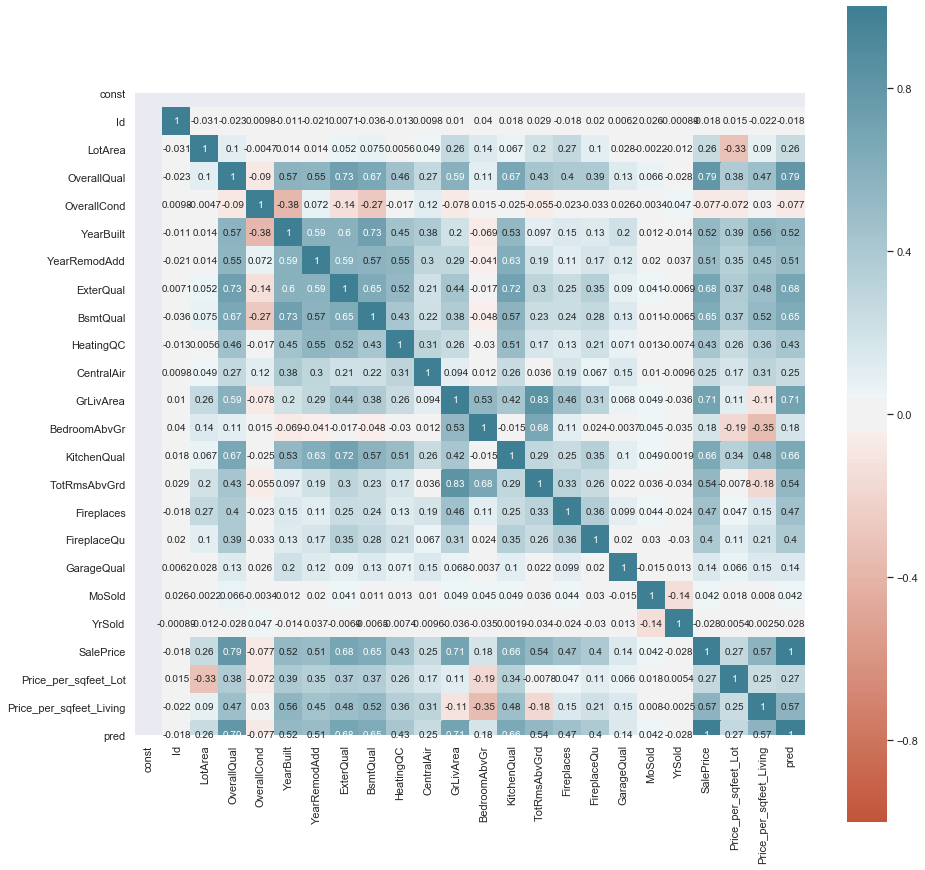

In [83]:
#a first heatmap to visualize the correlations among the columns that are within our df
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,vmin=-1, vmax=1,cmap=sns.diverging_palette(20, 220, n=200),square=True, ax=ax);
#with wnnot=True the value is displayed within the respective square

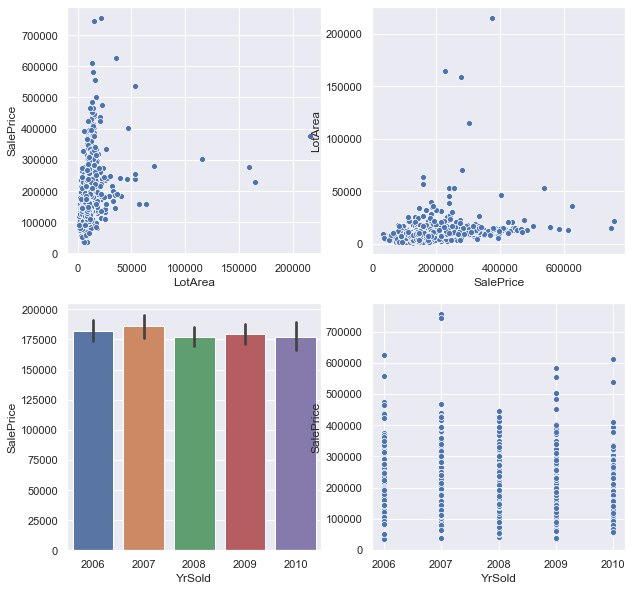

In [45]:
#Some plots in dependance of Sale Price, which are intuitively meaningful.
#Also the Sale Price switches axes one time, to think about it.
fig, axes = plt.subplots(2, 2,figsize=(10,10))
sns.barplot(x=df['YrSold'],y=df['SalePrice'],ax=axes[1,0]);
sns.scatterplot(x=df['LotArea'],y=df['SalePrice'],ax=axes[0,0]);
sns.scatterplot(x=df['SalePrice'],y=df['LotArea'],ax=axes[0,1]);
sns.scatterplot(x=df['YrSold'],y=df['SalePrice'], ax=axes[1,1]);

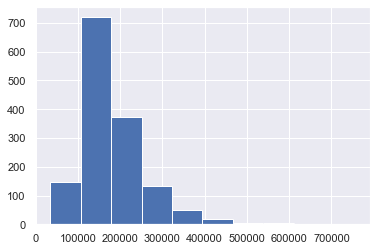

In [49]:
#Visualize the distribution of the SalePrice in multiple ways:
# a simple histogramm
df["SalePrice"].hist();

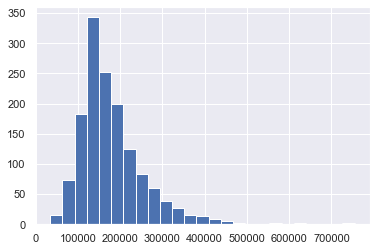

In [53]:
#binning the Price:
df["SalePrice"].hist(bins=25);

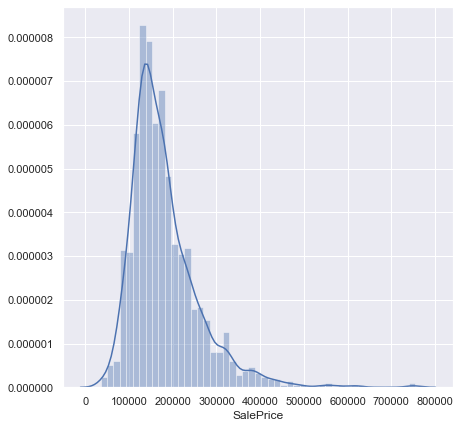

In [50]:
# a seaborn histogram with normal scale
f, ax = plt.subplots(figsize=(7, 7))
sns.distplot(df['SalePrice'],ax=ax);

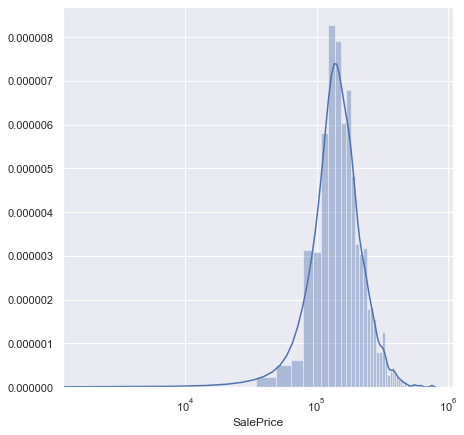

In [51]:
#a seaborn histogramm with logarithmic scale:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log") 
sns.distplot(df['SalePrice'],ax=ax);

In [54]:
#assign to more columns to the df, which represent ratios. Ratios are more significant than absolute values
df=df.assign(Price_per_sqfeet_Lot=df['SalePrice']/df['LotArea'])

In [55]:
df=df.assign(Price_per_sqfeet_Living=df['SalePrice']/df['GrLivArea'])

## Statistical model: Linear Regression

In [56]:
df = sm.add_constant(df)

C:\Users\zaruc\Miniconda3\envs\day1\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [57]:
#lin. reg. for the most likely influence due to intuition
lin_reg = sm.OLS(df["LotArea"],
                 df[["const", "SalePrice"]]).fit()

In [58]:
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                LotArea   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     104.4
Date:                Sat, 16 Nov 2019   Prob (F-statistic):           1.02e-23
Time:                        15:49:38   Log-Likelihood:                -15395.
No. Observations:                1454   AIC:                         3.079e+04
Df Residuals:                    1452   BIC:                         3.080e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4618.3869    626.967      7.366      0.0

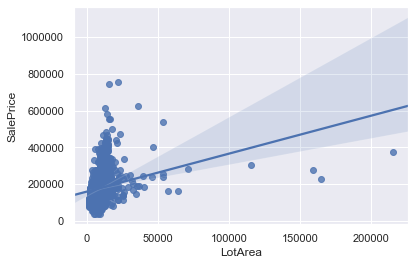

In [60]:
#Plotting the graph with seaborn
sns.regplot(x='LotArea', y='SalePrice', data=df);

In [61]:
df['pred'] = lin_reg.predict()

In [62]:
df_mean=df.groupby(by='YrSold').mean()

In [63]:
#Exporting a file for further use
df_mean.to_csv('Mean_by_Year.csv') 
#sample ist aimes

General scatterplot of SalePrice-YearBuild to decide which way they are supposed to be:

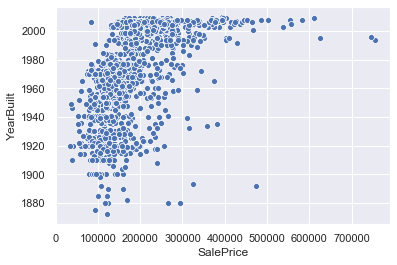

In [64]:
sns.scatterplot(y=df['YearBuilt'],x=df['SalePrice']);

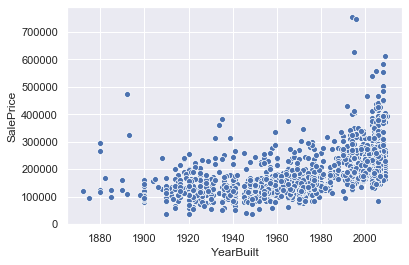

In [65]:
sns.scatterplot(y=df['SalePrice'],x=df['YearBuilt']);

In [66]:
correlation_all=df.corrwith(df['SalePrice'])

In [67]:
correlation_all.sort_values()

OverallCond               -0.077438
YrSold                    -0.027766
Id                        -0.017999
MoSold                     0.042272
GarageQual                 0.144474
BedroomAbvGr               0.180937
CentralAir                 0.251723
LotArea                    0.259012
Price_per_sqfeet_Lot       0.274471
FireplaceQu                0.399377
HeatingQC                  0.429630
Fireplaces                 0.466030
YearRemodAdd               0.508251
YearBuilt                  0.523372
TotRmsAbvGrd               0.539982
Price_per_sqfeet_Living    0.572834
BsmtQual                   0.648764
KitchenQual                0.658978
ExterQual                  0.681837
GrLivArea                  0.709671
OverallQual                0.790095
SalePrice                  1.000000
pred                       1.000000
const                           NaN
dtype: float64

Taking the 10 most influencing parameters into our calculation of the Multiple Linear Regression:

In [98]:
c_1=correlation_all.sort_values()[:5]

In [101]:
c_2=correlation_all.sort_values()[-8:-3]

In [102]:
correlations_for_regression=c_1.append(c_2)

In [106]:
correlations_for_regression

OverallCond   -0.077438
YrSold        -0.027766
Id            -0.017999
MoSold         0.042272
GarageQual     0.144474
BsmtQual       0.648764
KitchenQual    0.658978
ExterQual      0.681837
GrLivArea      0.709671
OverallQual    0.790095
dtype: float64

In [86]:
#correlations_for_regression=sm.add_constant(correlations_for_regression) still wrong because in this case we only take the indexes of it
#I have to tell him, that I want const from the df(df has it from previous regression attempt)

In [109]:
correlations_for_regression

OverallCond   -0.077438
YrSold        -0.027766
Id            -0.017999
MoSold         0.042272
GarageQual     0.144474
BsmtQual       0.648764
KitchenQual    0.658978
ExterQual      0.681837
GrLivArea      0.709671
OverallQual    0.790095
dtype: float64

In [124]:
Temporary_DataFrame=pd.DataFrame(correlations_for_regression)
Temporary_DataFrame.loc['const'] = 1.0 #1.0 is just a dummy in this case, it could be anything, because we just
#use the index ('const'), to look it up in df and there is the constant written from lin.reg. performed before (1.0)
correlations_for_regression_with_const=Temporary_DataFrame[0] #convert it back to a series, in order to use its index
#names for looking them up in df when doing linear regression right below.

In [121]:
#Trying out Multiple linear regression
model=sm.OLS(df["SalePrice"],df[correlations_for_regression_with_const.index]).fit()
model.summary()
#why is there no const? --> because I added it to df before, now its correctly added to correlations_for_regression
#(my model doesn't know df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     474.3
Date:                Sat, 16 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:01:04   Log-Likelihood:                -17407.
No. Observations:                1454   AIC:                         3.484e+04
Df Residuals:                    1443   BIC:                         3.489e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
OverallCond  3209.4619    963.985      3.329      0.001    1318.500    5100.424
YrSold       -505.7518    769.794     -0.657      0.511   -2015.786    1004.282
Id             -2.2826      2.402     -0.950      0.342      -6.994       2.429
MoSold       -215.6165    378.622     -0.569      0.569    -958.325     527.092
GarageQual   1.152e+04   4241.958      2.715      0.007    3195.677    1.98e+04
BsmtQual      2.18e+04   2221.777      9.810      0.000    1.74e+04    2.62e+04
KitchenQual  1.544e+04   2334.282      6.616      0.000    1.09e+04       2e+04
ExterQual    1.472e+04   2957.055      4.977      0.000    8917.723    2.05e+04
GrLivArea      56.5442      2.389     23.669      0.000      51.858      61.230
OverallQual  1.603e+04   1314.063     12.195      0.000    1.34e+04    1.86e+04
const        7.817e+05   1.55e+06      0.506      0.613   -2.25e+06    3.81e+06
==============================================================================
Omnibus:                      373.248   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18776.200
Skew:                           0.306   Prob(JB):                         0.00
Kurtosis:                      20.594   Cond. No.                     4.05e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
model.rsquared
#means, the model explains the variation of the variable around the mean.

0.7667142270251759

R-squared is a statistical measure of how close the datapoints recored are to the fitted regression line. It's a correlation coefficient, so we want it to be as close to 1 as possible, because it would significate, that our model is good, since those values are behaving similar to the data of df.
In our case the values for the Sale Price, predicted through the considered series of the df (names of the considered columns are saved in 'correlations_for_regression') are close to the ones predicted through the model, so it is a good model.

In [126]:
model.params

OverallCond      3209.461937
YrSold           -505.751847
Id                 -2.282580
MoSold           -215.616465
GarageQual      11516.740927
BsmtQual        21795.408742
KitchenQual     15442.997016
ExterQual       14718.310737
GrLivArea          56.544245
OverallQual     16025.569658
const          781746.587396
dtype: float64

Originally, it was planned, to weight the individual features (e.g. since OverallQuality contains the values 1-10, but some -'Qual' columns contain values between 1-5, the absolute values that OverallQuality would contribute to a 'common score' double times than the features between 1&5(bcs it'll be added up). So to make them equal we would have taken 'Qual' twice. Or we consider OverallQuality as twice important. <br/>
That was my approach, but then I realized (or at least I think it is the case), that this 'general rating', I wanted to pass to my linear regression model, along with SalePrice is already part of the regression, so I put multiple parameters into it and ran a multiple regression. <br/>
Also I wanted to create bins for the features with higher values, e.g. 'YrSold' and 'LotArea', to have them in pockets of 1-5 or 1-10 bins, but I would then name them 1-5 and 1-10 respectively and would lose the information, that was contained before. So I did not go on with that idea. <br/>
So the planned 'NewRating' can not be found in this notebook, but instead a multiple regression.

All of the Features named in the cell above ('model.params') play a role for that regression model, with the R-square provided.